# Student Performance Indicator

Problem Statement: his project understands how the student's performance (test scores) is affected by other variables 
such as Gender,Ethnicity, Parental level of education, Lunch and Test preparation course.

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977

The data consists of 8 column and 1000 rows.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Dataset/Student_Performance_Indicator.csv')

In [3]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [4]:
df = data.copy()

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

Define numerical and categorical values

In [9]:
numerical_feature = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_feature = [feature for feature in df.columns if df[feature].dtype == 'O']

In [10]:
print(f"We have {len(numerical_feature)} numberical feature that is: {numerical_feature}")
print(f"We have {len(categorical_feature)} Categorical feature that is: {categorical_feature}")

We have 3 numberical feature that is: ['math_score', 'reading_score', 'writing_score']
We have 5 Categorical feature that is: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


## Numerical Feature 

In [11]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score'] 
df['average'] = df['total_score'] / 3

In [12]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [13]:
read_full = df[df['reading_score'] == 100]['average'].count()
writing_full = df[df['writing_score'] == 100]['average'].count()
math_full = df[df['math_score'] == 100]['average'].count()


print(f"Number of student wiht full marks in maths {math_full}")
print(f"Number of student wiht full marks in reading {read_full}")
print(f"Number of student with full marks in writing {writing_full}")

Number of student wiht full marks in maths 7
Number of student wiht full marks in reading 17
Number of student with full marks in writing 14


In [14]:
read_less = df[df['reading_score'] <= 20]['average'].count()
writing_less = df[df['writing_score'] <= 20]['average'].count()
math_less = df[df['math_score'] <= 20]['average'].count()


print(f"Number of student wiht full marks in maths {math_less}")
print(f"Number of student wiht full marks in reading {read_less}")
print(f"Number of student with full marks in writing {writing_less}")

Number of student wiht full marks in maths 4
Number of student wiht full marks in reading 1
Number of student with full marks in writing 3


Insights :

        From above values we get students have performed the worst in Maths

        Best performance is in reading section

## Categorical Variables

In [15]:
print(f"'Gender':         {df['gender'].unique()}")
print(f"'Race_ethnicity': {df['race_ethnicity'].unique()}")
print(f"'parental_level_of_education' :    {df['parental_level_of_education'].unique()}")
print(f"'lutest_preparation_coursench' :    {df['lunch'].unique()}")
print(f"'test_preparation_course' :    {df['test_preparation_course'].unique()}")

'Gender':         ['female' 'male']
'Race_ethnicity': ['group B' 'group C' 'group A' 'group D' 'group E']
'parental_level_of_education' :    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
'lutest_preparation_coursench' :    ['standard' 'free/reduced']
'test_preparation_course' :    ['none' 'completed']


## Exploring Data ( Visualization )

array([[<Axes: title={'center': 'math_score'}>]], dtype=object)

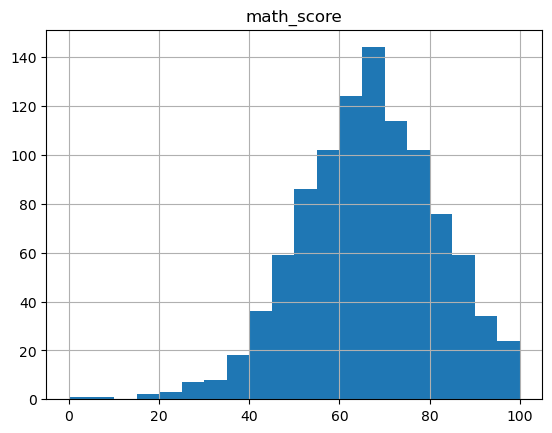

In [16]:
df.hist(column='math_score',bins=20)

array([[<Axes: title={'center': 'reading_score'}>]], dtype=object)

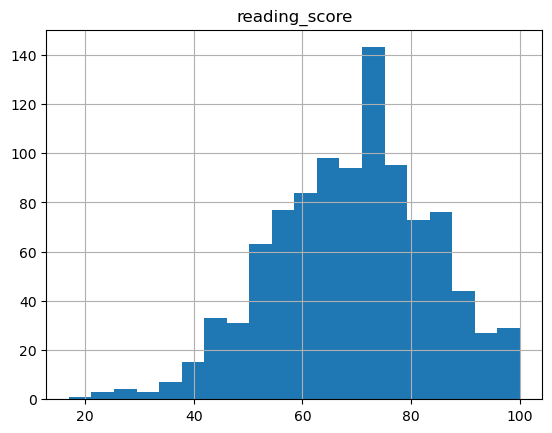

In [17]:
df.hist(column='reading_score',bins=20)

array([[<Axes: title={'center': 'writing_score'}>]], dtype=object)

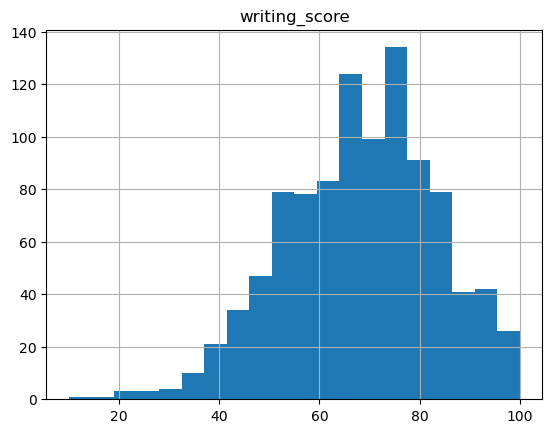

In [18]:
df.hist(column='writing_score',bins=20)

<Axes: xlabel='average', ylabel='Count'>

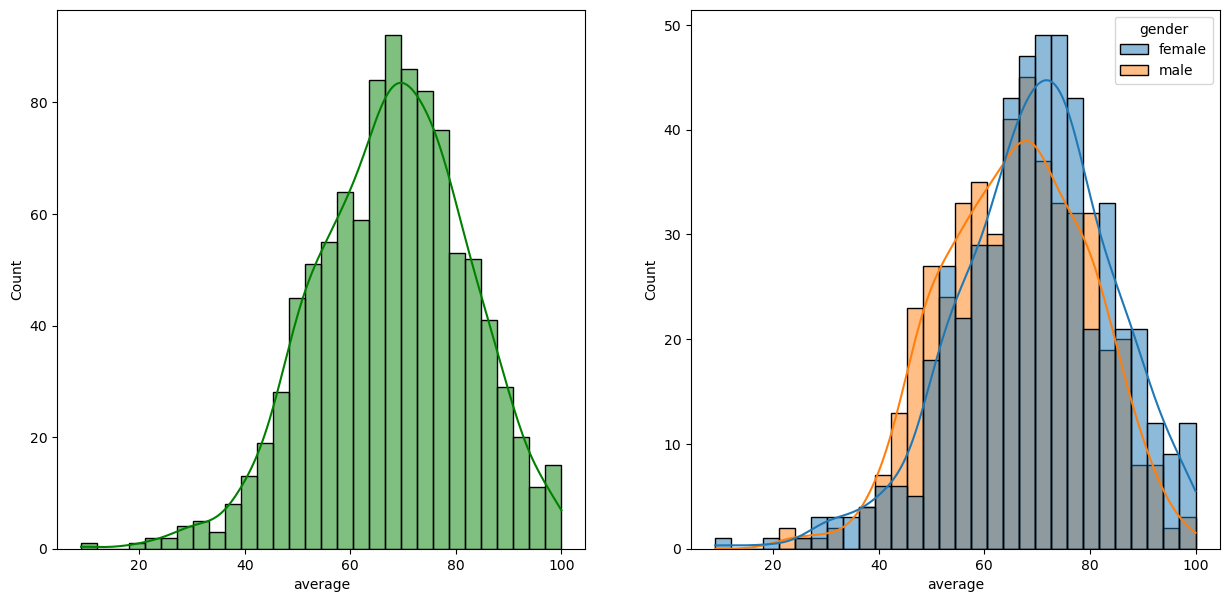

In [19]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='average',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average',bins=30,kde=True,hue='gender')

<Axes: xlabel='total_score', ylabel='Count'>

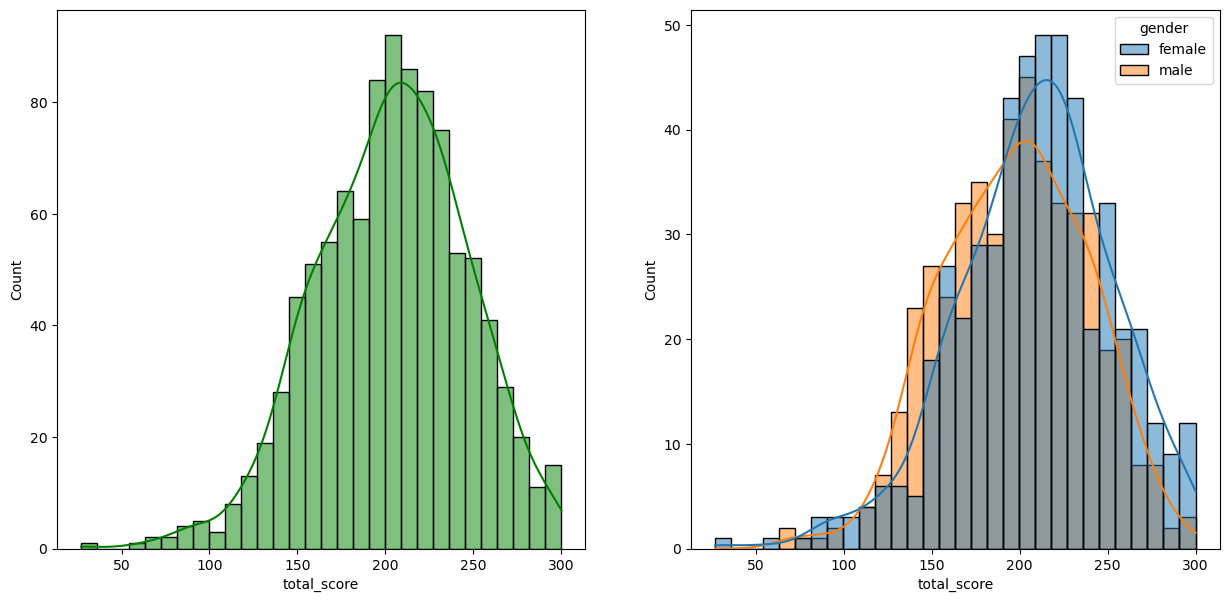

In [20]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',bins=30,kde=True,hue='gender')

C:\Users\papal\AppData\Local\Temp\ipykernel_1900\3382387801.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
C:\Users\papal\AppData\Local\Temp\ipykernel_1900\3382387801.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
C:\Users\papal\AppData\Local\Temp\ipykernel_1900\3382387801.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


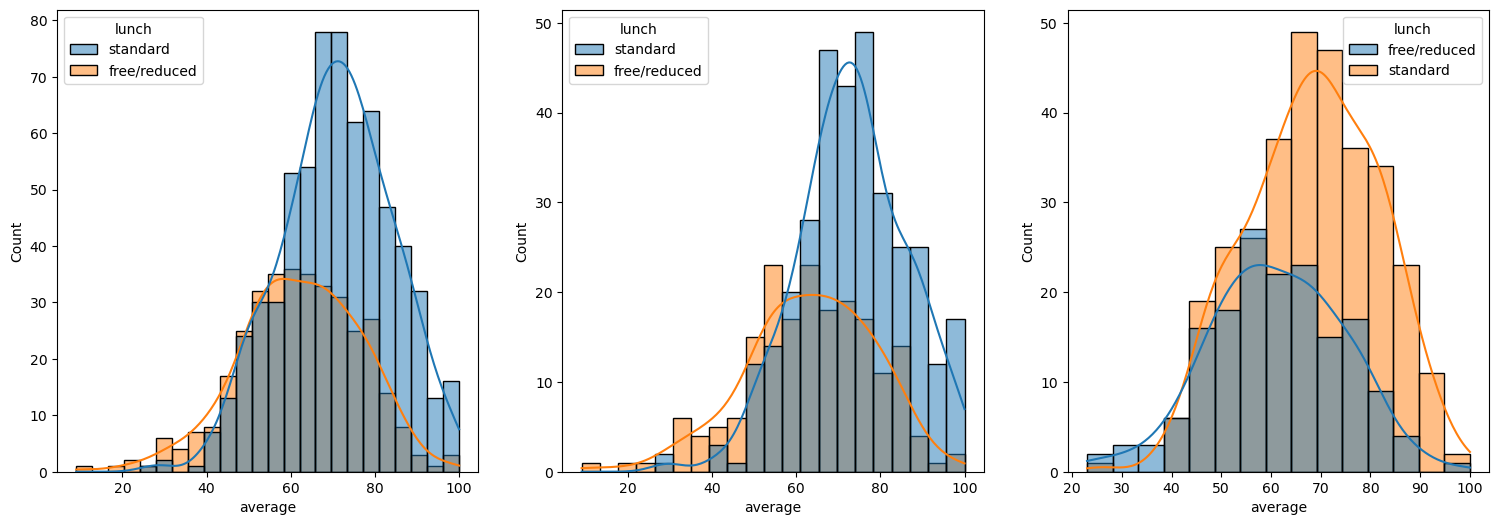

In [21]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average',kde=True,hue='lunch')
plt.show()

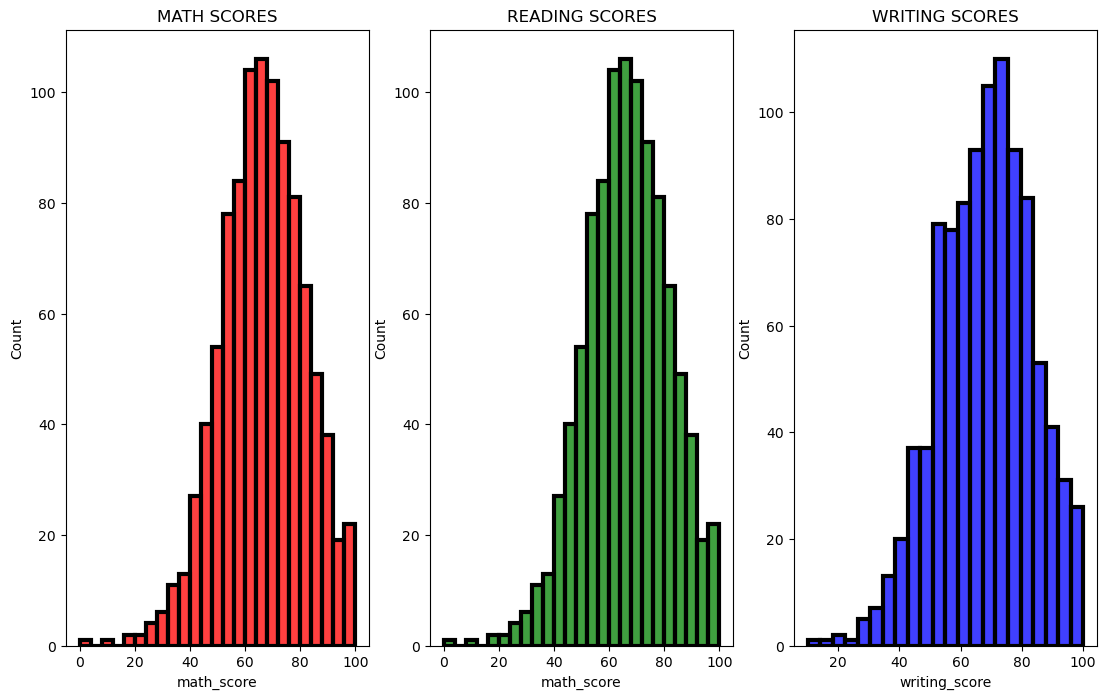

In [22]:
plt.figure(figsize=(18,8))
plt.subplot(141)
plt.title('MATH SCORES')
sns.histplot(data=df,x='math_score',color='red',linewidth=3)
plt.subplot(142)
plt.title('READING SCORES')
sns.histplot(data=df,x='math_score',color='g',linewidth=3)
plt.subplot(143)
plt.title('WRITING SCORES')
sns.histplot(x='writing_score',data=df,color='blue',linewidth=3)
plt.show()

Insights

        From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

In [23]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


(-1.25, 1.25, -1.25, 1.25)

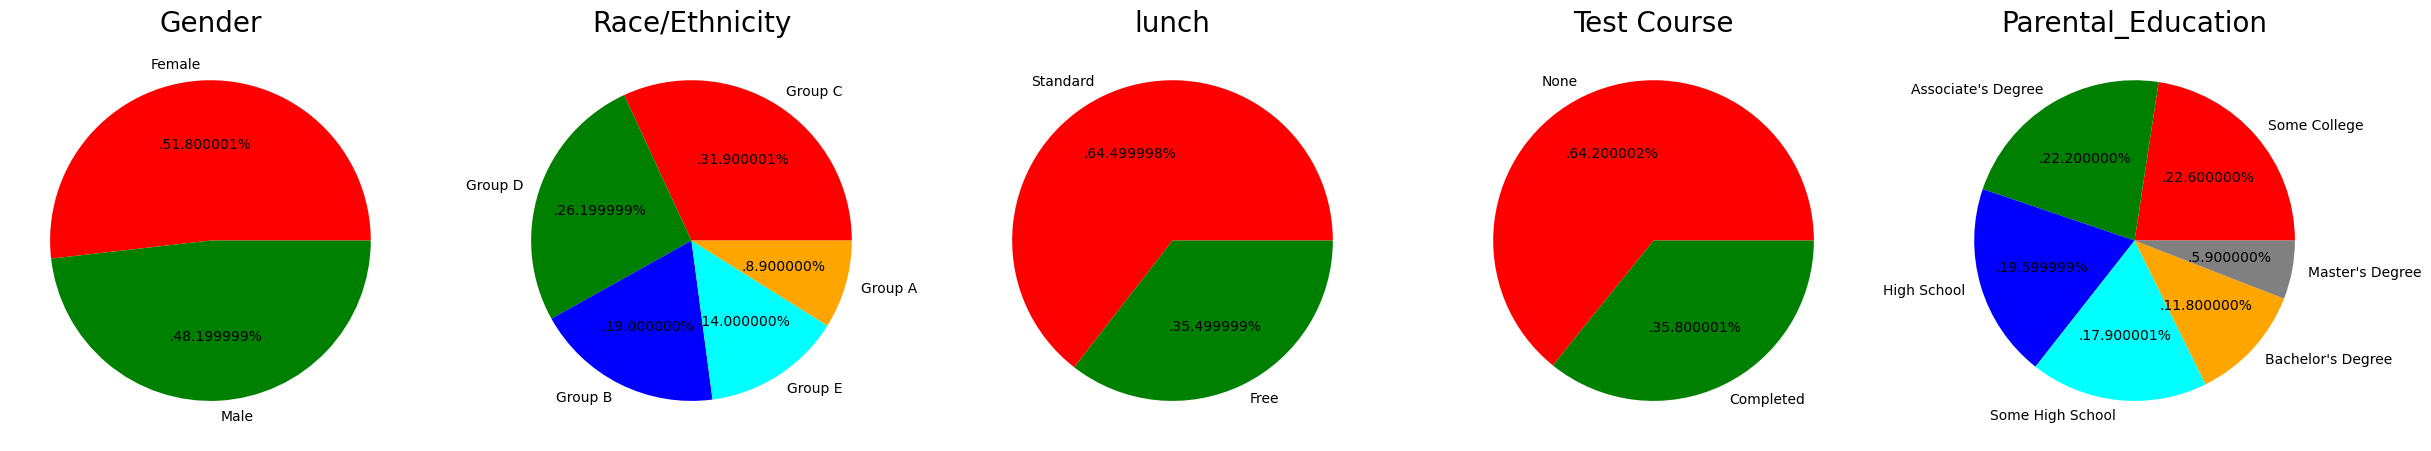

In [24]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test_preparation_course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental_level_of_education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental_Education', fontsize = 20)
plt.axis('off')


##  CHECKING OUTLIERS

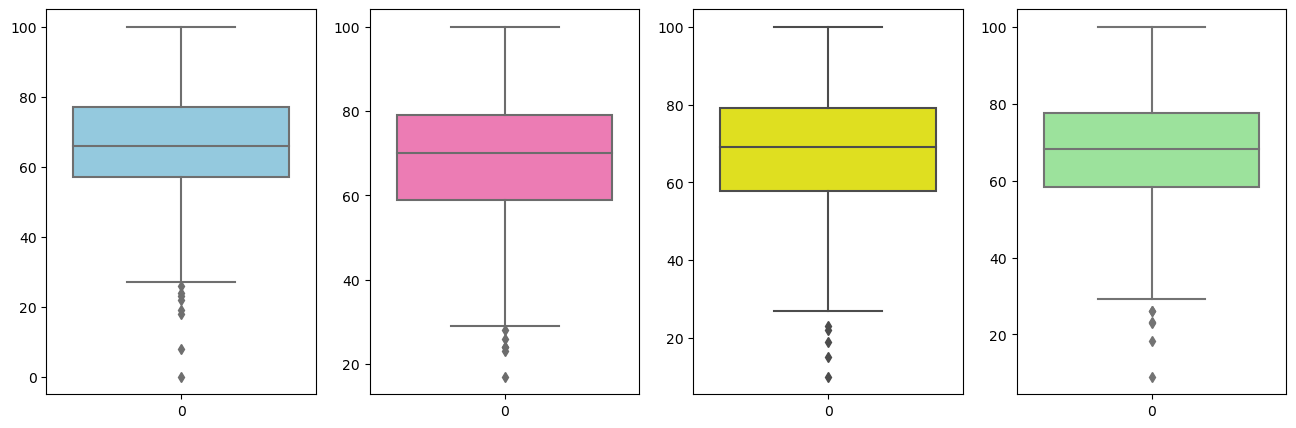

In [25]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

In [26]:
df['math_score'].describe()

count    1000.00000
mean       66.08900
std        15.16308
min         0.00000
25%        57.00000
50%        66.00000
75%        77.00000
max       100.00000
Name: math_score, dtype: float64

In [27]:
maths_lower_bound = df['math_score'].mean() - 3*df['math_score'].std()
maths_lower_bound

20.599759711971593

In [28]:
df['reading_score'].describe()

count    1000.000000
mean       69.169000
std        14.600192
min        17.000000
25%        59.000000
50%        70.000000
75%        79.000000
max       100.000000
Name: reading_score, dtype: float64

In [29]:
reading_lower_bound = df['reading_score'].mean() - 3*df['reading_score'].std()
reading_lower_bound

25.36842418824334

In [30]:
df['writing_score'].describe()

count    1000.000000
mean       68.054000
std        15.195657
min        10.000000
25%        57.750000
50%        69.000000
75%        79.000000
max       100.000000
Name: writing_score, dtype: float64

In [31]:
wirting_lower_bound = df['writing_score'].mean() - 3*df['writing_score'].std()
wirting_lower_bound

22.467028967391073

In [32]:
df.loc[df['math_score'] <= 20.59,'math_score'] = 20.59

In [33]:
df.loc[df['reading_score'] <= 25.36,'reading_score'] = 25.36

In [34]:
df.loc[df['writing_score'] <= 22.46,'writing_score'] = 22.46

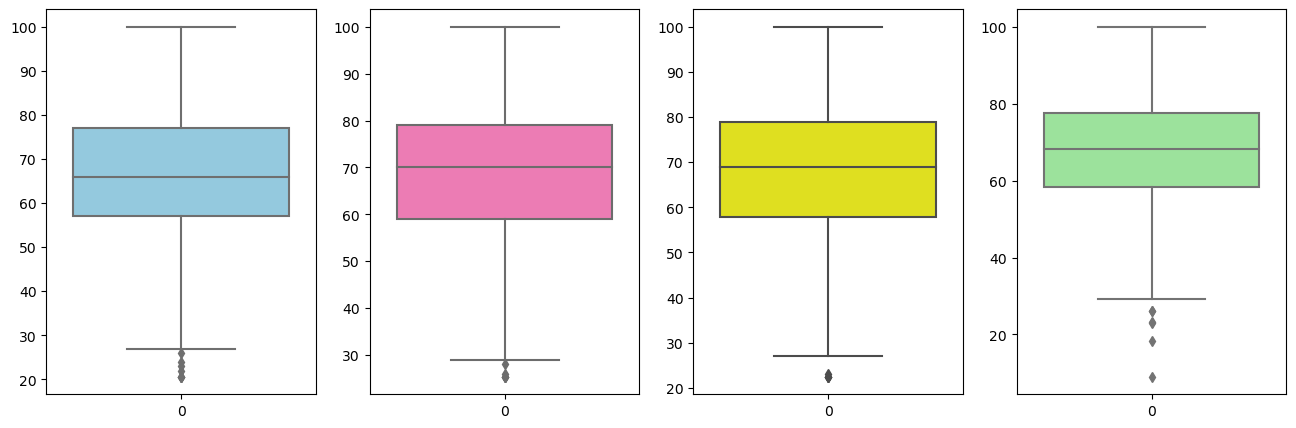

In [35]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()